In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.Q_BAI import Q_UGapEc
from codes.Environment import Mixture_AbsGau, setup_env, Exp
from codes.SimulatedGames import simulate
from codes.plots import plot_hist, plot_eva

%matplotlib inline

In [2]:
# setting

num_exper = 50
num_rounds = 10000
num_arms = 3
est_flag = True # estimate the lower bound of hazard rate L
tau = 0.9 # quantile level

# environment

environments = [
    {Mixture_AbsGau: [[0, 0.5, 0,1, 1], [0.5, 1, 0, 1, 1]], Exp: [0.5]}, # mu1, sigma1, mu2, sigma2, p
    
]

rewards_env, quantiles, Ls, means, samples = setup_env(num_arms, environments, tau)

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 0.5, 0, 1, 1], [0.5, 1, 0, 1, 1]], <class 'codes.Environment.Exp'>: [0.5]}


In [3]:
arm_name_dict = {
    0: 'A',
    1: 'B',
    2: 'C'
}

for key in quantiles.keys():
    print(key)
    quantiles[key] = list(np.around(np.array(quantiles[key]),2))
    means[key] = list(np.around(np.array(means[key]),2))
    t = PrettyTable(['Eva', 'A', 'B', 'C', 'Best Arm'])
    t.add_row([str(tau) + '-Quantile'] + quantiles[key]+ [arm_name_dict[np.argmax(quantiles[key])]])
    t.add_row(['Mean']+ means[key]+ [arm_name_dict[np.argmax(means[key])]])
    t.add_row(['L']+ Ls[key]+ [arm_name_dict[np.argmax(Ls[key])]])
    print(t)
    print()

Mixture_AbsGau_[[0, 0.5, 0, 1, 1], [0.5, 1, 0, 1, 1]]Exp_[0.5]
+--------------+--------------------+-------------------+------+----------+
|     Eva      |         A          |         B         |  C   | Best Arm |
+--------------+--------------------+-------------------+------+----------+
| 0.9-Quantile |        0.82        |        1.84       | 4.58 |    C     |
|     Mean     |        0.4         |        0.9        | 1.99 |    C     |
|      L       | 1.5957691216057308 | 0.704130653528599 | 0.5  |    A     |
+--------------+--------------------+-------------------+------+----------+



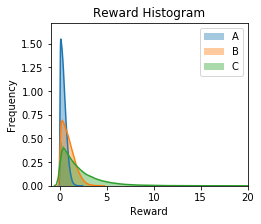

In [4]:
plot_hist(samples)

In [5]:
# run experiments

def run_exper(rewards_env, hyperpara_list, num_exper, budget_or_confi, epsilon, tau, m, policy, summary_stats, est_flags = [est_flag]):
    for key in rewards_env.keys():
        for hyperpara in hyperpara_list:
            for est_flag in est_flags:
                name = key + '_' + str(num_exper) + '_' + str(num_rounds)
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
                subname = policy_name + str(hyperpara)
                print(name + subname)
                p = IntProgress(max = num_exper)
                p.description = 'Running'
                display(p)
                error, std = simulate(rewards_env[key],summary_stats[key], policy, 
                                                 epsilon, tau, m, budget_or_confi, num_exper, est_flag, hyperpara, None, p)
                return error, std

In [6]:
confi = 0.2
epsilon = 1
tau = 0.9
m = 1
num_exper = 1

In [7]:
hyperpara_list = [[1]]
error, std = run_exper(rewards_env, hyperpara_list, num_exper, confi, epsilon, tau, m, Q_UGapEc, quantiles)

Mixture_AbsGau_[[0, 0.5, 0, 1, 1], [0.5, 1, 0, 1, 1]]Exp_[0.5]_1_10000Q_UGapEc-[1]


IntProgress(value=0, description='Running', max=1)

32275


In [8]:
error

32275.0

In [9]:
std

0.0